In [4]:
import pandas as pd     
import numpy as np             
import matplotlib.pyplot as plt                       
import seaborn as sns             
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [2]:
!pip install catboost
!pip install xgboost

  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 5.6 MB/s eta 0:00:19
   ---------------------------------------- 1.0/102.4 MB 2.6 MB/s eta 0:00:39
    --------------------------------------- 1.3/102.4 MB 2.2 MB/s eta 0:00:46
    --------------------------------------- 1.3/102.4 MB 2.2 MB/s eta 0:00:46
    --------------------------------------- 1.3/102.4 MB 2.2 MB/s eta 0:00:46
    --------------------------------------- 1.3/102.4 MB 2.2 MB/s eta 0:00:46
    ---------------------------------------

In [5]:
from sklearn.metrics import mean_absolute_error

In [34]:
df=pd.read_csv('stud.csv')

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['Total_score']/3

In [37]:
df.drop(['math_score', 'reading_score', 'writing_score'], axis=1, inplace=True)

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [38]:
X=df.drop(columns=['Total_score'],axis=1)
y=df['Total_score']

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   average_score                1000 non-null   float64
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [40]:
num_feature=X.select_dtypes(exclude='object').columns
cat_feature=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [41]:
X=preprocessor.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 18), (200, 18), (800,), (200,))

In [45]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae, mse, rmse, r2

In [46]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
}
model_list=[]
r2_list=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    ###MAKE PREDICTION
    y_train_pred=model.predict(X_train)
    t_test_pred=model.predict(X_test)
    
    ###EVALUATE MODEL
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2_score=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2_score=evaluate_model(y_test,t_test_pred)
    
    print(f"Model Name: {list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])
    print(f"Training MAE: {model_train_mae}")
    print(f"Training MSE: {model_train_mse}")
    print(f"Training RMSE: {model_train_rmse}")
    print(f"Training R2 Score: {model_train_r2_score}")
    print("-=====-------------------------------------------------")
    print(f"Test MAE: {model_test_mae}")
    print(f"Test MSE: {model_test_mse}")
    print(f"Test RMSE: {model_test_rmse}")
    print(f"Test R2 Score: {model_test_r2_score}")
    r2_list.append(model_test_r2_score)
    print("========================================================\n\n")
    print("\n\n")
    

Model Name: LinearRegression
Training MAE: 2.042810365310288e-14
Training MSE: 8.729219232813628e-28
Training RMSE: 2.954525212756464e-14
Training R2 Score: 1.0
-=====-------------------------------------------------
Test MAE: 1.8829382497642654e-14
Test MSE: 8.108227928223647e-28
Test RMSE: 2.8474950269005995e-14
Test R2 Score: 1.0





Model Name: Ridge
Training MAE: 0.0507157510148377
Training MSE: 0.0038753933894038347
Training RMSE: 0.0622526576894821
Training R2 Score: 0.9999978410605245
-=====-------------------------------------------------
Test MAE: 0.05356095169247837
Test MSE: 0.004680906534839704
Test RMSE: 0.06841715088221449
Test R2 Score: 0.9999975737787185





Model Name: Lasso
Training MAE: 0.8075024891061002
Training MSE: 1.018143118011259
Training RMSE: 1.0090307814983936
Training R2 Score: 0.9994328035509327
-=====-------------------------------------------------
Test MAE: 0.8311744383271741
Test MSE: 1.114557814977165
Test RMSE: 1.0557262026572822
Test R2 Score: 0

RESULT

In [47]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
0,LinearRegression,1.000000
1,Ridge,0.999998
2,Lasso,0.999422
4,DecisionTreeRegressor,0.997901
7,XGBRegressor,0.997708
5,RandomForestRegressor,0.996368
6,AdaBoostRegressor,0.992108
8,CatBoostRegressor,0.988599
3,KNeighborsRegressor,0.879285


In [48]:
###SO WE ARE CHOOSING LINEAR REGRESSION AS OUR FINAL MODEL
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f"%score)

accuracy of the model is 100.00


Text(0.5, 1.0, 'Actual vs Predicted Total Score')

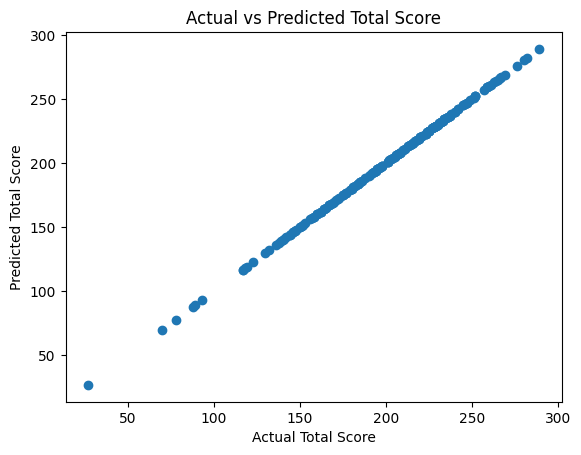

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score")

In [51]:
###DIFFERENCE BETWEEN ACTUAL AND PREDICTED VALUE
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,0.000000e+00
740,225,225.0,2.842171e-14
660,224,224.0,0.000000e+00
411,245,245.0,0.000000e+00
...,...,...,...
408,165,165.0,0.000000e+00
332,171,171.0,0.000000e+00
208,231,231.0,2.842171e-14
613,216,216.0,2.842171e-14
